In [1390]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [1391]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [1392]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [1395]:
len(df_model['Vehicle'].unique())

112

In [1396]:
len(df_validation['date'].unique())

30

In [1397]:
len(df_model['Date'].unique())

30

In [1398]:
validation_vehicles=df_validation['equipment_id'].unique()

In [1399]:
df_model_filtered=df_model.loc[df_model.Vehicle.isin(validation_vehicles)]

In [1400]:
df_model['Date']=pd.to_datetime(df_model['Date'])

In [1401]:
df_model_filtered

,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,ServiceDateTime,Unnamed: 0,Unnamed: 0.1,DateKey,...,time_delta_in_seconds,Powertrain,VehicleModel,Vehicle_mass,elevation,grade,Power(KW),FuelRate(L/s),Energy,FuelRate/Energy
2391,2391,2391,2391,1297419,1297419,2391,2022-04-29 14:01:44,2391,1273034,8788,...,0.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,64.0,0.000000,0.000000,0.000000,0.000000,NaN
2392,2392,2392,2392,1299038,1299038,2392,2022-04-29 14:28:20,2392,1273037,8788,...,1596.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,134.0,0.000000,17.951176,0.000000,7.958355,NaN
2393,2393,2393,2393,1299039,1299039,2393,2022-04-29 14:28:20,2393,1273500,8788,...,0.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,134.0,0.000000,0.000000,0.000000,0.000000,NaN
2394,2394,2394,2394,1299250,1299250,2394,2022-04-29 14:30:55,2394,1273501,8788,...,155.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,135.0,0.000000,15.474333,0.000000,0.666256,NaN
2395,2395,2395,2395,1299272,1299272,2395,2022-04-29 14:31:09,2395,1273502,8788,...,14.0,electric,2021 NEW FLYER XE35 (ELECTRIC),26900.0,129.0,3.189728,12813.465677,0.000000,49.830144,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859995,859995,859995,859995,243563,243563,859995,2022-04-06 13:48:32,859995,244984,8765,...,12.0,conventional,New Flyer 40 conventional,26000.0,24.0,0.000000,6.402932,0.002280,0.007228,NaN
859996,859996,859996,859996,243632,243632,859996,2022-04-06 13:49:46,859996,244985,8765,...,74.0,conventional,New Flyer 40 conventional,26000.0,39.0,0.000000,3.181612,0.001968,0.038474,NaN
859997,859997,859997,859997,243647,243647,859997,2022-04-06 13:49:58,859997,244986,8765,...,12.0,conventional,New Flyer 40 conventional,26000.0,21.0,0.000000,21.451357,0.003741,0.011860,NaN
859998,859998,859998,859998,243658,243658,859998,2022-04-06 13:50:14,859998,244987,8765,...,16.0,conventional,New Flyer 40 conventional,26000.0,20.0,0.000000,-1.025654,0.001660,0.007016,NaN


In [1402]:
df_model_filtered = df_model_filtered.groupby(['Vehicle', 'Date']).agg({'Energy': ['sum'] ,'Powertrain': ['max'], 'dist': ['sum']}).reset_index()

In [1403]:
df_model_filtered

,Vehicle,Date,Energy,Powertrain,dist
,,,sum,max,sum
0,1320,2022-04-29,103.365410,electric,38.462541
1,1321,2022-04-01,12.529456,electric,9.615819
2,1321,2022-04-04,22.465345,electric,11.612397
3,1321,2022-04-05,41.688642,electric,25.229515
4,1321,2022-04-06,-7.714091,electric,7.551147
...,...,...,...,...,...
1835,1852,2022-04-02,46.040188,conventional,145.670278
1836,1852,2022-04-03,27.186147,conventional,99.923447
1837,1852,2022-04-04,36.691270,conventional,124.783763


In [1404]:
df_model_filtered['Energy']

,sum
0,103.365410
1,12.529456
2,22.465345
3,41.688642
4,-7.714091
...,...
1835,46.040188
1836,27.186147
1837,36.691270
1838,33.361374


In [1405]:
model_vehicles=df_model['Vehicle'].unique()

In [1406]:
df_validation_filtered=df_validation.loc[df_validation.equipment_id.isin(model_vehicles)]

In [1407]:
len(df_validation_filtered.equipment_id.unique())

108

In [1408]:
df_validation_filtered

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain
586,600,2022-04-01 16:22:00,1619,21.44,2022-04-01,conventional
587,601,2022-04-02 18:56:00,1619,15.56,2022-04-02,conventional
588,602,2022-04-04 15:45:00,1619,8.49,2022-04-04,conventional
589,603,2022-04-06 21:51:00,1619,57.05,2022-04-06,conventional
590,604,2022-04-07 16:01:00,1619,12.73,2022-04-07,conventional
...,...,...,...,...,...,...
2530,24227,2022-04-26 19:18:00,1729,30.41,2022-04-26,conventional
2531,24228,2022-04-27 17:46:00,1729,24.32,2022-04-27,conventional
2532,24229,2022-04-28 20:31:00,1729,31.70,2022-04-28,conventional
2533,24230,2022-04-29 18:44:00,1729,24.14,2022-04-29,conventional


In [1409]:
#df_validation_filtered=df_validation_filtered[df_validation_filtered['gallons']<70]

In [1410]:
df_validation_filtered['gallons'].mean()

30.253386727688767

In [1411]:
df_validation_filtered['gallons'].median()

31.17

In [1412]:
df_validation_filtered['gallons'].max()

84.79

In [1413]:
df_validation_filtered = df_validation_filtered.groupby(['equipment_id', 'date']).agg({'gallons': ['sum']}).reset_index()

In [1414]:
df_validation_filtered

,equipment_id,date,gallons
,,,sum
0,1320,2022-04-27,0.68
1,1320,2022-04-29,0.69
2,1321,2022-04-18,1.83
3,1321,2022-04-19,0.58
4,1321,2022-04-29,0.66
...,...,...,...
1701,1852,2022-04-26,39.54
1702,1852,2022-04-27,30.05
1703,1852,2022-04-28,41.30


In [1415]:
df_validation_filtered.rename(
    columns={"equipment_id":"Vehicle",
                "date":"Date",
                "gallons":"Real_Energy"}
          ,inplace=True)

In [1416]:
cols = ['Vehicle', 'Date']
df_integrated=df_model_filtered.join(df_validation_filtered.set_index(cols), on=cols)

In [1417]:
df_integrated

,Vehicle,Date,Energy,Powertrain,dist,Real_Energy
,,,sum,max,sum,sum
0,1320,2022-04-29,103.365410,electric,38.462541,0.69
1,1321,2022-04-01,12.529456,electric,9.615819,NaN
2,1321,2022-04-04,22.465345,electric,11.612397,NaN
3,1321,2022-04-05,41.688642,electric,25.229515,NaN
4,1321,2022-04-06,-7.714091,electric,7.551147,NaN
...,...,...,...,...,...,...
1835,1852,2022-04-02,46.040188,conventional,145.670278,37.54
1836,1852,2022-04-03,27.186147,conventional,99.923447,21.94
1837,1852,2022-04-04,36.691270,conventional,124.783763,37.47


In [1418]:
df_integrated.columns

MultiIndex([(    'Vehicle',    ''),
            (       'Date',    ''),
            (     'Energy', 'sum'),
            ( 'Powertrain', 'max'),
            (       'dist', 'sum'),
            ('Real_Energy', 'sum')],
           )

In [1419]:
df_integrated.columns = df_integrated.columns.droplevel()

In [1420]:
df_integrated.columns =['Vehicle', 'Date', 'Energy', 'Powertrain', 'Distance', 'Real_Energy']

In [1421]:
df_integrated

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy
0,1320,2022-04-29,103.365410,electric,38.462541,0.69
1,1321,2022-04-01,12.529456,electric,9.615819,NaN
2,1321,2022-04-04,22.465345,electric,11.612397,NaN
3,1321,2022-04-05,41.688642,electric,25.229515,NaN
4,1321,2022-04-06,-7.714091,electric,7.551147,NaN
...,...,...,...,...,...,...
1835,1852,2022-04-02,46.040188,conventional,145.670278,37.54
1836,1852,2022-04-03,27.186147,conventional,99.923447,21.94
1837,1852,2022-04-04,36.691270,conventional,124.783763,37.47
1838,1852,2022-04-05,33.361374,conventional,123.766490,29.92


In [1422]:
df_integrated.columns.nlevels 

1

In [1423]:
df_integrated['Real_Energy'].isna().sum()

228

In [1424]:
df_integrated['Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Energy']

In [1425]:
df_integrated['Real_Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Real_Energy']

In [1426]:
df_integrated=df_integrated.dropna()

In [1427]:
df_integrated

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
0,1320,2022-04-29,103.365410,electric,38.462541,0.69,0.372103,55.742813
7,1321,2022-04-18,157.241423,electric,81.710409,1.83,0.519649,44.650497
8,1321,2022-04-19,142.315019,electric,79.449076,0.58,0.558262,136.981166
14,1321,2022-04-29,-119.198095,electric,50.051221,0.66,-0.419900,75.835183
20,1322,2022-04-18,25.253993,electric,12.497164,0.96,0.494859,13.017879
...,...,...,...,...,...,...,...,...
1835,1852,2022-04-02,46.040188,conventional,145.670278,37.54,3.163981,3.880402
1836,1852,2022-04-03,27.186147,conventional,99.923447,21.94,3.675528,4.554396
1837,1852,2022-04-04,36.691270,conventional,124.783763,37.47,3.400912,3.330231
1838,1852,2022-04-05,33.361374,conventional,123.766490,29.92,3.709874,4.136581


<AxesSubplot:>

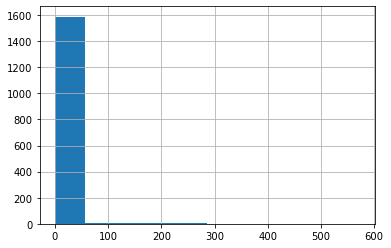

In [1428]:
df_integrated['Real_Fuel/energy_economy'].hist()

In [1429]:
df_hybrid=df_integrated.loc[df_integrated['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated.loc[df_integrated['Powertrain'] == 'conventional'].copy()

In [1430]:
df_hybrid

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
1197,1801,2022-04-01,29.009111,hybrid,152.778852,50.91,5.266582,3.000960
1198,1801,2022-04-02,34.039333,hybrid,168.948906,60.73,4.963344,2.781968
1200,1801,2022-04-07,2.148813,hybrid,10.000853,5.89,4.654129,1.697938
1201,1801,2022-04-08,47.457222,hybrid,156.441346,33.53,3.296471,4.665713
1202,1801,2022-04-09,31.951399,hybrid,138.727266,23.54,4.341821,5.893257
...,...,...,...,...,...,...,...,...
1295,1805,2022-04-18,42.983725,hybrid,132.561501,47.06,3.083993,2.816861
1296,1805,2022-04-19,48.400956,hybrid,174.278975,30.33,3.600734,5.746092
1297,1805,2022-04-20,48.473206,hybrid,147.407519,26.80,3.041010,5.500281
1298,1805,2022-04-21,34.674449,hybrid,116.122463,23.70,3.348935,4.899682


In [1431]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 20)]

In [1432]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] > 1)]

In [1433]:
train_conventional, test_conventional = train_test_split(df_conventional, test_size=0.2, random_state=(42))    
train_hybrid, test_hybrid = train_test_split(df_hybrid, test_size=0.2, random_state=(42))    

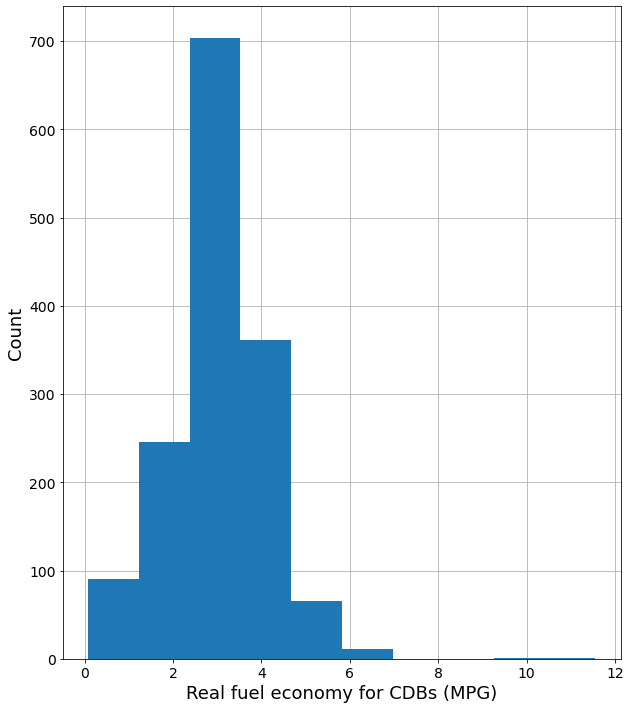

In [1434]:
fig, ax = plt.subplots()
df_conventional['Real_Fuel/energy_economy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real fuel economy for CDBs (MPG)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-economy-CDB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

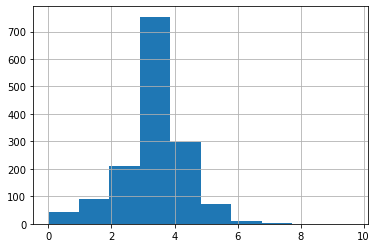

In [1435]:
df_conventional['Fuel/energy_economy'].hist()

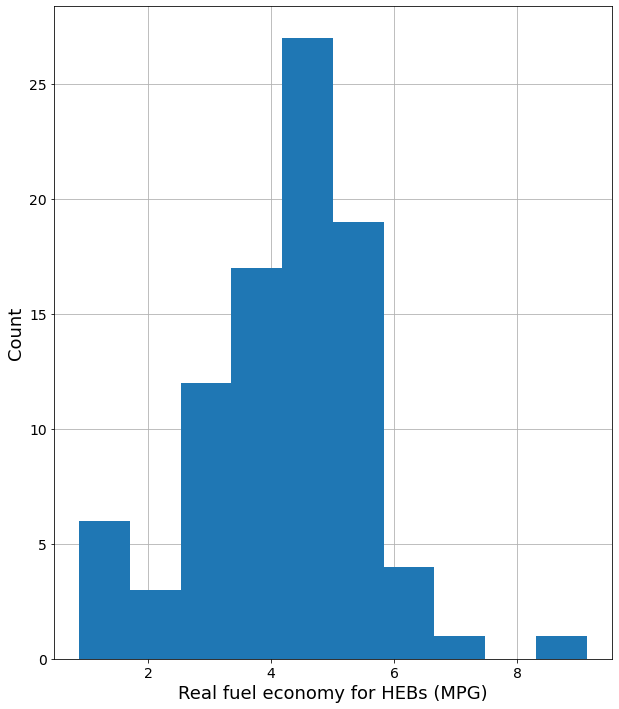

In [1436]:
fig, ax = plt.subplots()
df_hybrid['Real_Fuel/energy_economy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real fuel economy for HEBs (MPG)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-economy-HEB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

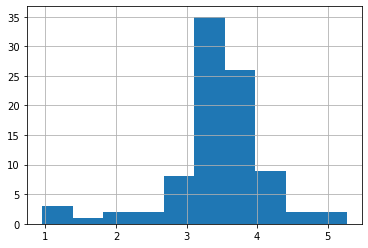

In [1437]:
df_hybrid['Fuel/energy_economy'].hist()

In [1438]:
df_conventional['Fuel/energy_economy'].mean()

3.374196575760373

In [1439]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.0324572740056106

In [1440]:
df_hybrid['Fuel/energy_economy'].mean()

3.417037890553007

In [1441]:
df_hybrid['Real_Fuel/energy_economy'].mean()

4.263853521302183

In [1442]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 20)]

In [1443]:
#df_conventional['Real_Fuel/energy_economy'].hist()

In [1444]:
#df_integrated.to_csv(r'../../results/model_plus_validation_results.csv')

In [1445]:
from sklearn.metrics import mean_squared_error

rmse_conventional = mean_squared_error(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_test = mean_squared_error(test_conventional['Real_Fuel/energy_economy'], test_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_test = mean_squared_error(test_hybrid['Real_Fuel/energy_economy'], test_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_train = mean_squared_error(train_conventional['Real_Fuel/energy_economy'], train_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_train = mean_squared_error(train_hybrid['Real_Fuel/energy_economy'], train_hybrid['Fuel/energy_economy'], squared=False)

In [1446]:
#print("For conventional RMSE total:", rmse_conventional, "test:", rmse_conventional_test, "train": rmse_conventional_train)

In [1447]:
rmse_conventional

1.3136399439876225

In [1448]:
rmse_conventional_test

1.4390031861976578

In [1449]:
rmse_conventional_train

1.2803826910646685

In [1387]:
rmse_hybrid

1.6251723927673145

In [1388]:
rmse_hybrid_test

1.9368126942380357

In [1389]:
rmse_hybrid_train

1.5374234223615488

In [1073]:
#mse_hybrid = np.square(np.subtract(df_hybrid['Real_Fuel/energy_economy'],df_hybrid['Fuel/energy_economy'])).mean() 
#rmse_hybrid = math.sqrt(mse_hybrid)

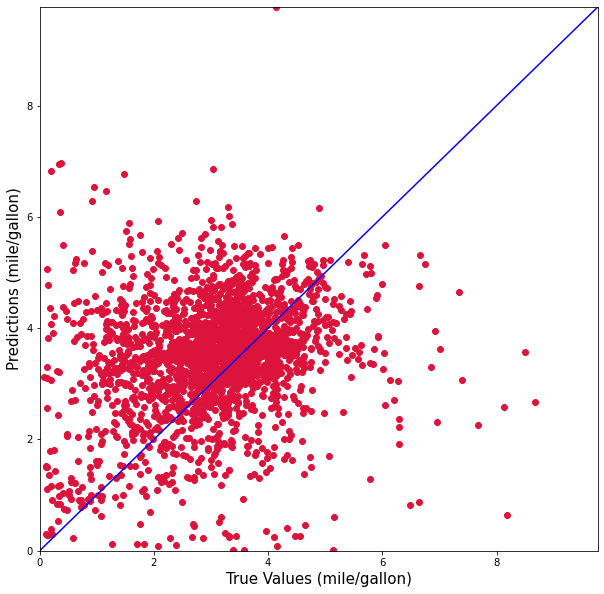

In [1077]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], c='crimson')

p1 = max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Real_Fuel/energy_economy']))
p2 = min(min(df_conventional['Fuel/energy_economy']), min(df_conventional['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (mile/gallon)', fontsize=15)
plt.ylabel('Predictions (mile/gallon)', fontsize=15)
plt.xlim([0, max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Fuel/energy_economy']))])
plt.ylim([0, max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Fuel/energy_economy']))])
fig.savefig(r'../../figures/actual-predicted-CDB.png', dpi=400, bbox_inches='tight')
plt.show()

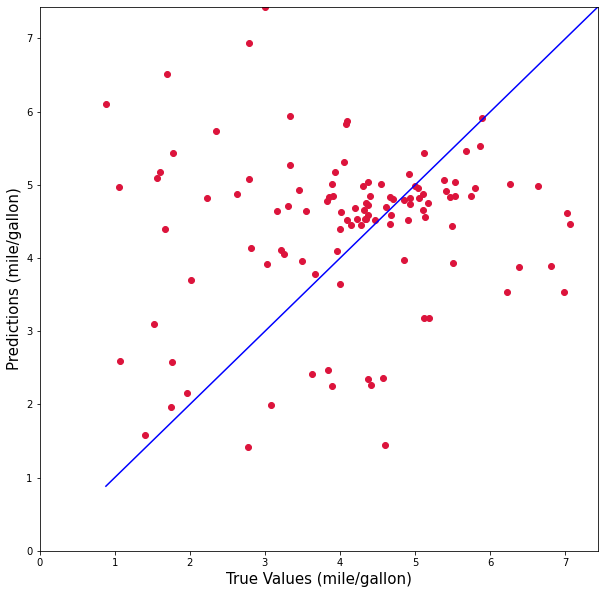

In [1076]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], c='crimson')

p1 = max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Real_Fuel/energy_economy']))
p2 = min(min(df_hybrid['Fuel/energy_economy']), min(df_hybrid['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (mile/gallon)', fontsize=15)
plt.ylabel('Predictions (mile/gallon)', fontsize=15)
plt.xlim([0, max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Fuel/energy_economy']))])
plt.ylim([0, max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Fuel/energy_economy']))])
fig.savefig(r'../../figures/actual-predicted-HEB.png', dpi=400, bbox_inches='tight')
plt.show()

In [366]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.253903059579212

In [367]:
df_conventional['Fuel/energy_economy'].mean()

3.4768101787935617

In [368]:
df1_vehicles=[3212]

In [370]:
df_integrated.loc[df_integrated['Vehicle'].isin(df1_vehicles)]

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
2083,3212,2022-04-07,54.448165,conventional,135.018871,29.3,2.479769,4.608153
2084,3212,2022-04-08,29.268055,conventional,76.937812,77.1,2.628730,0.997896
2086,3212,2022-04-11,30.128772,conventional,91.369757,29.5,3.032641,3.097280
2087,3212,2022-04-12,14.322785,conventional,16.616347,10.6,1.160134,1.567580
2089,3212,2022-04-14,36.638109,conventional,154.372203,42.6,4.213433,3.623761
2090,3212,2022-04-15,5.323859,conventional,17.189445,55.9,3.228756,0.307503
2091,3212,2022-04-23,21.680445,conventional,63.446732,33.1,2.926450,1.916820
2092,3212,2022-04-24,22.640343,conventional,63.427457,21.3,2.801524,2.977815
2094,3212,2022-04-26,18.438642,conventional,19.213700,46.2,1.042034,0.415881
2096,3212,2022-04-28,28.856438,conventional,100.280686,60.2,3.475158,1.665792


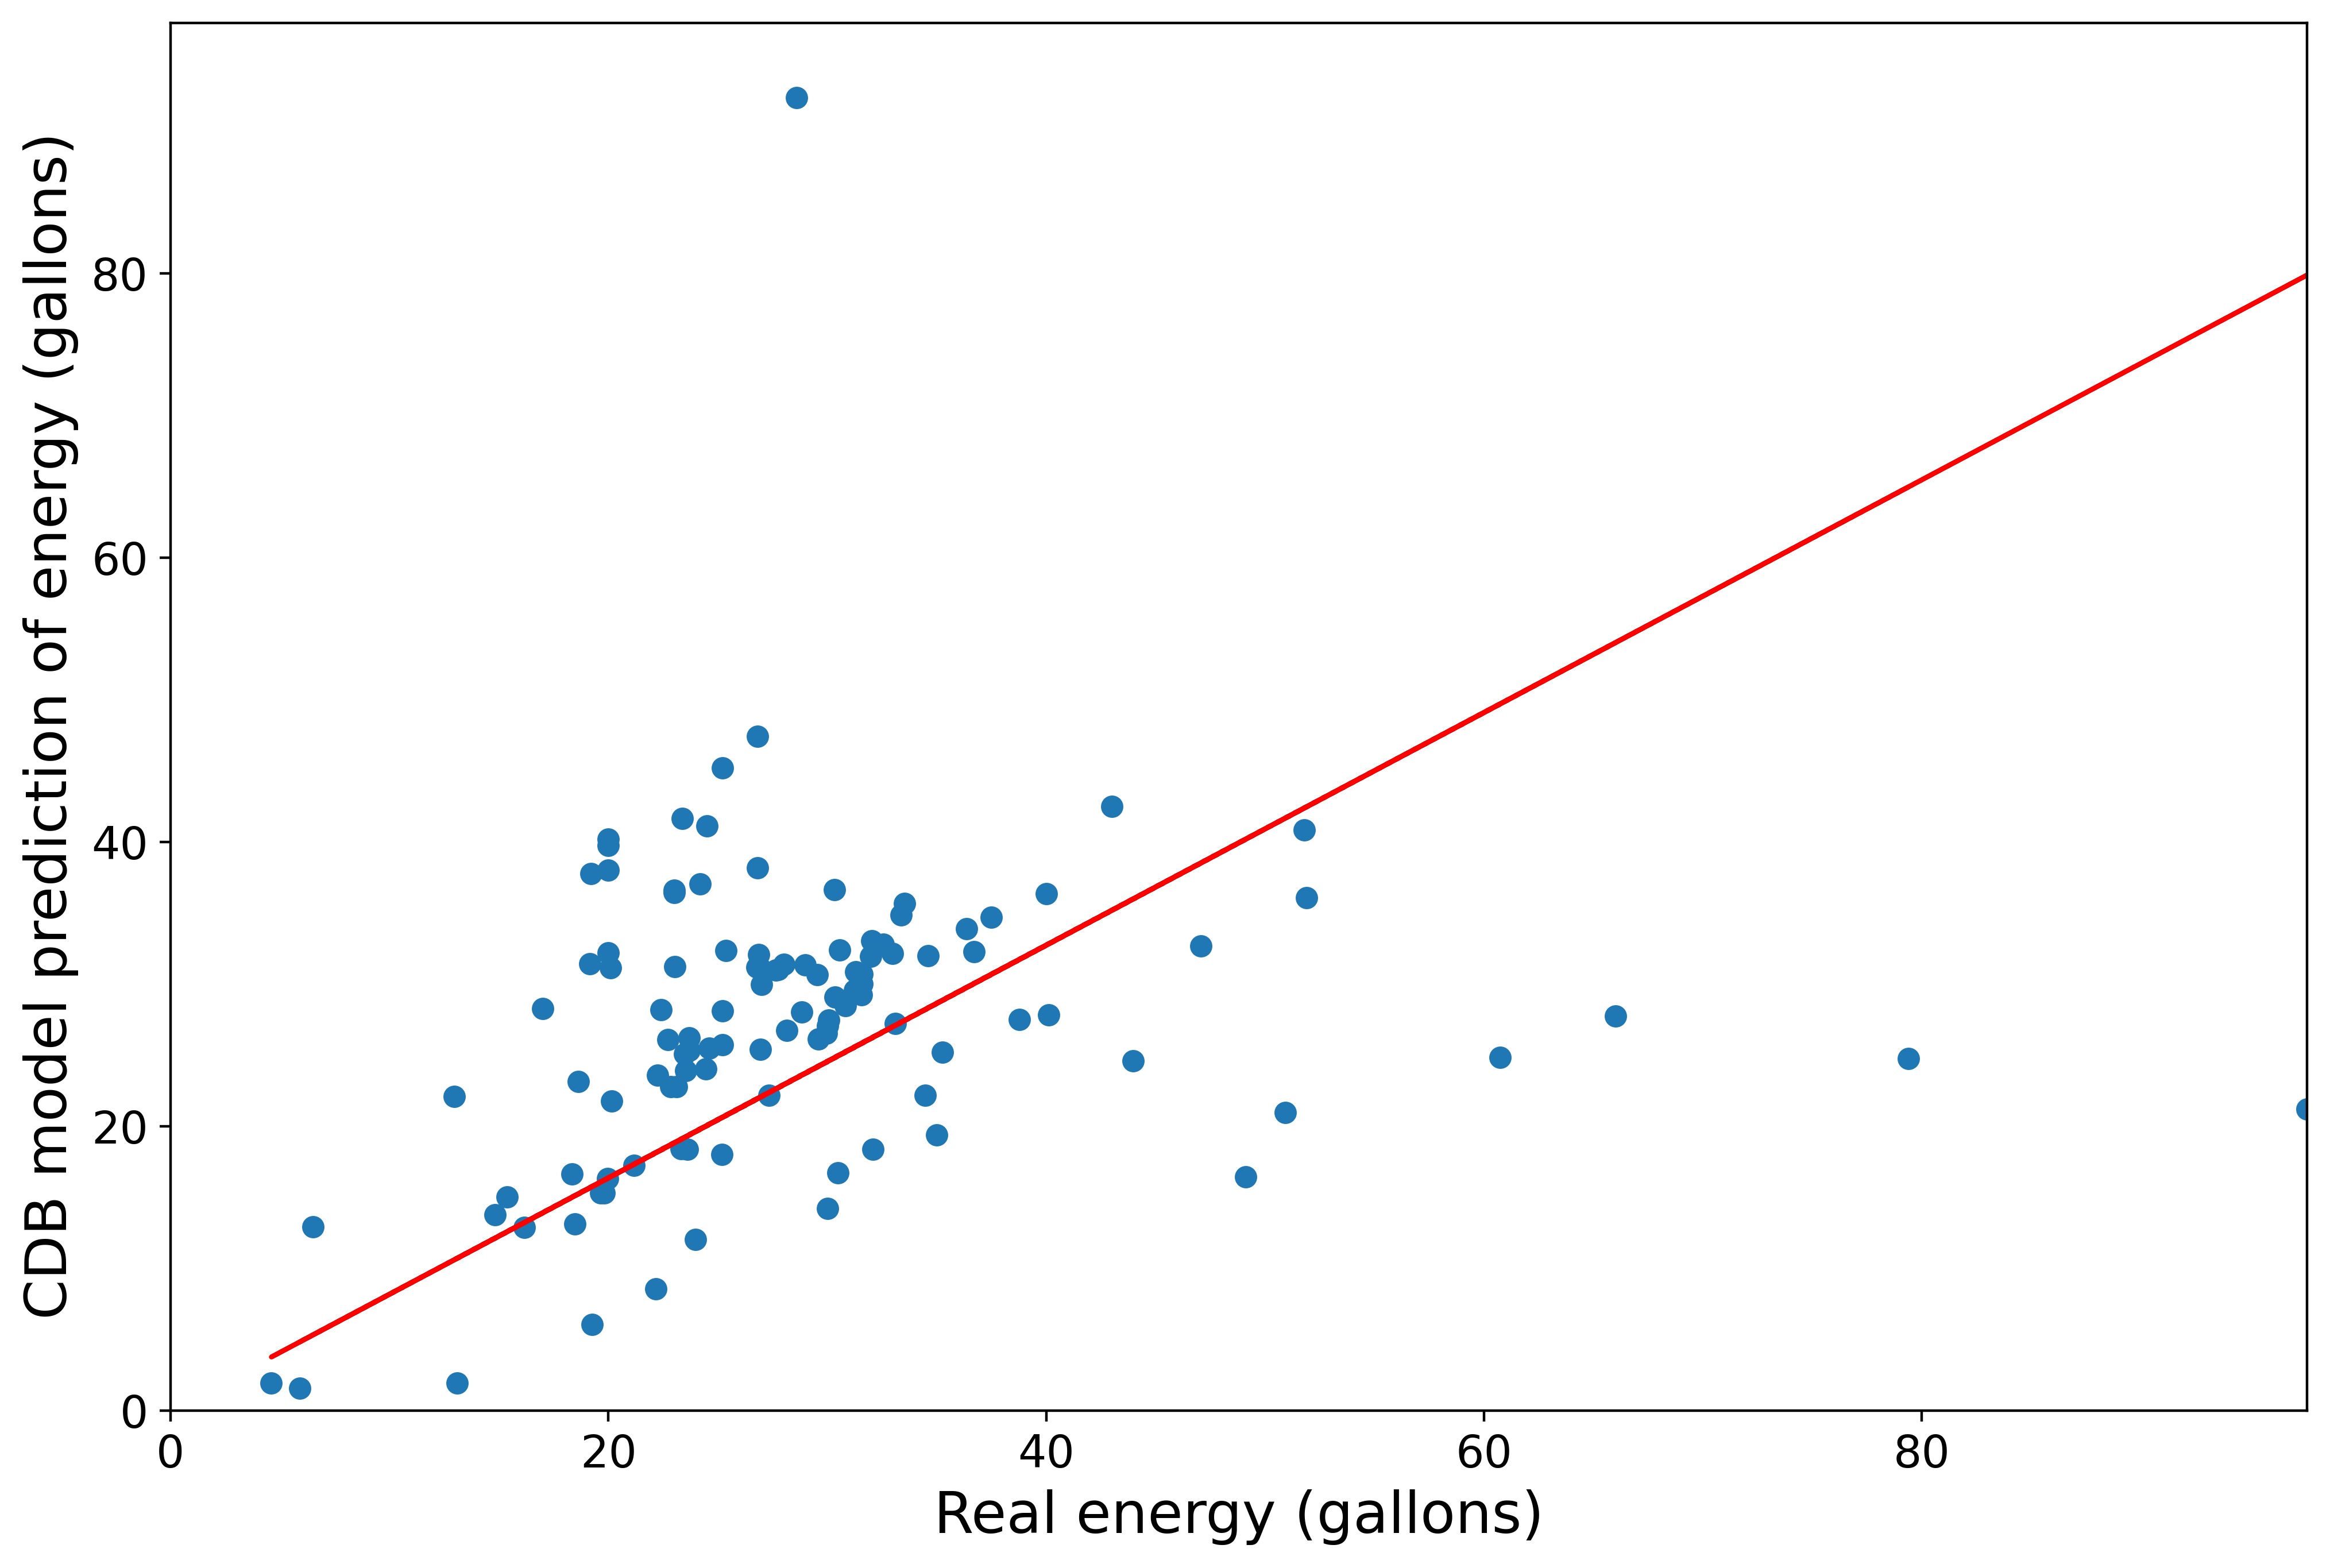

In [391]:
figure(figsize=(12, 8), dpi=400)
plt.plot(df_hybrid['Real_Energy'], 0.8183*df_hybrid['Real_Energy'], color='red')
plt.scatter(x=df_hybrid['Real_Energy'], y=df_hybrid['Energy'])
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("CDB model prediction of energy (gallons) ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.savefig(r'../../figures/beta-estimation.png', dpi=400, bbox_inches='tight')
plt.show()

In [376]:
X= df_hybrid['Real_Energy']
y= df_hybrid['Energy']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Energy   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              372.9
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                    3.96e-37
Time:                        08:22:53   Log-Likelihood:                         -450.90
No. Observations:                 111   AIC:                                      903.8
Df Residuals:                     110   BIC:                                      906.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [381]:
df_hybrid_filtered=df_hybrid[df_hybrid['Real_Energy']<=40]
df_hybrid_filtered=df_hybrid_filtered[df_hybrid['Energy']<=40]

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_39472\108788406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hybrid_filtered=df_hybrid_filtered[df_hybrid['Energy']<=40]


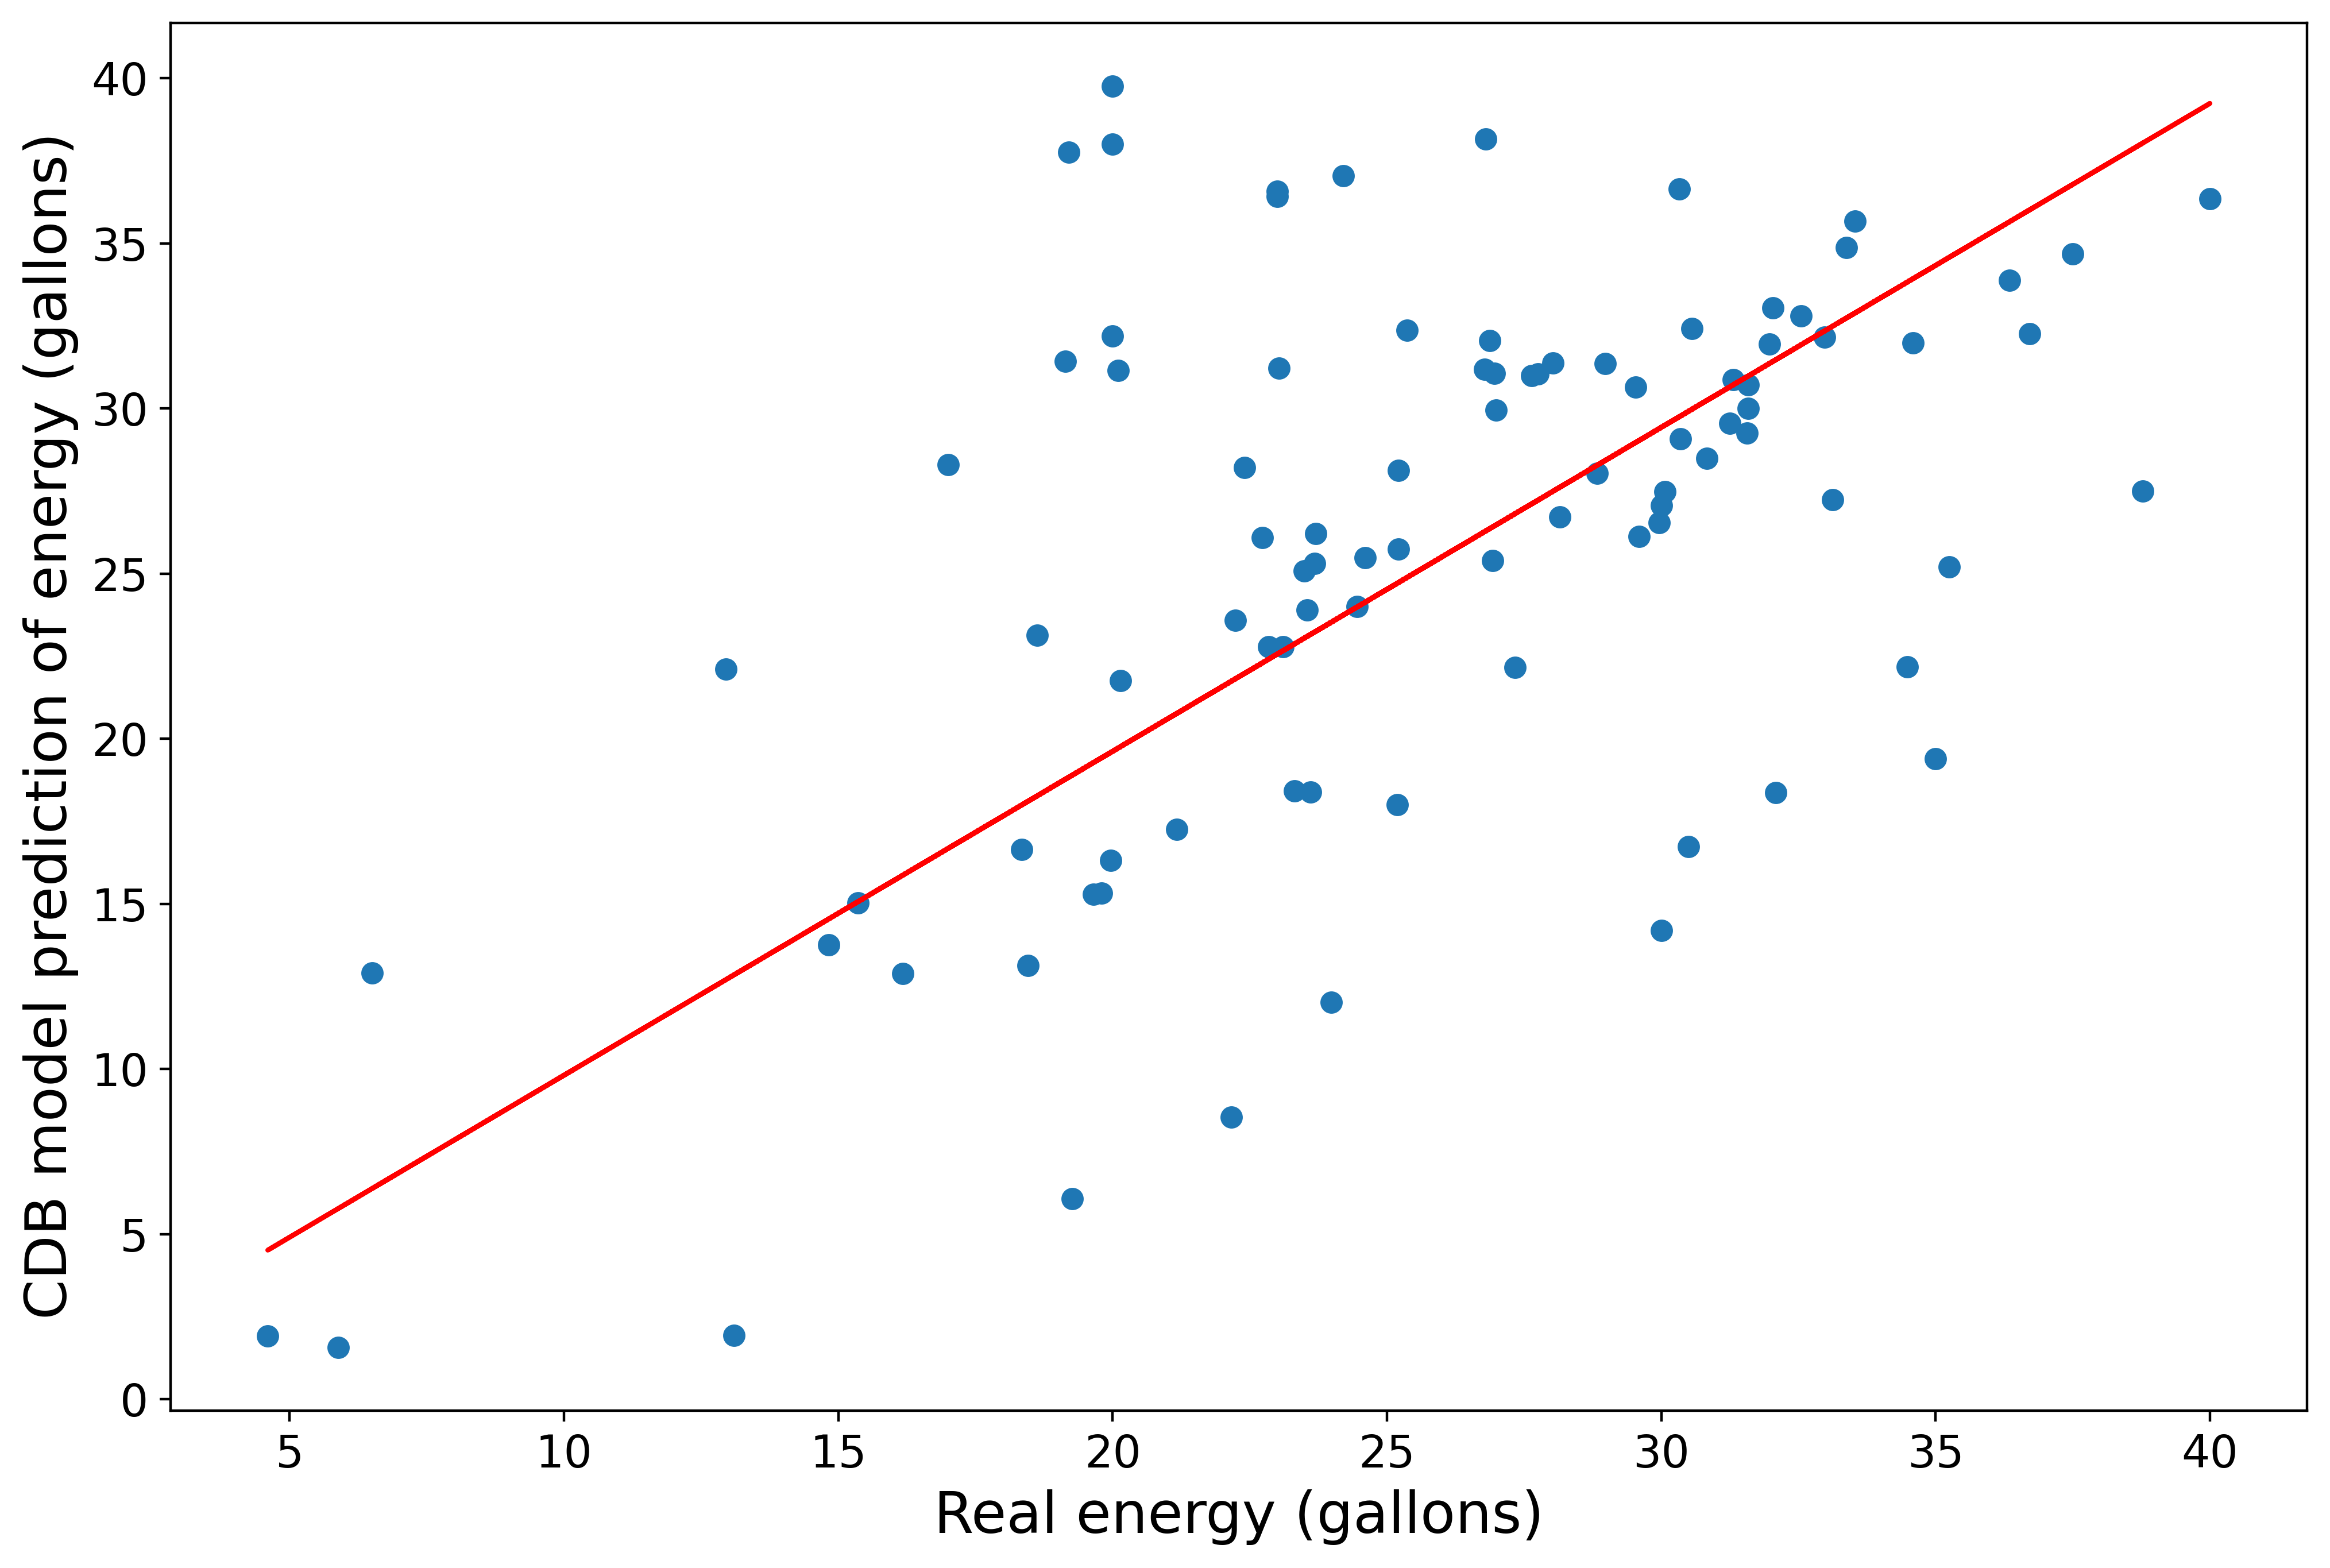

In [388]:
figure(figsize=(12, 8), dpi=400)
plt.plot(df_hybrid_filtered['Real_Energy'], 0.9810*df_hybrid_filtered['Real_Energy'], color='red')
plt.scatter(x=df_hybrid_filtered['Real_Energy'], y=df_hybrid_filtered['Energy'])
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("CDB model prediction of energy (gallons) ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/beta-estimation-without outliers.png', dpi=400, bbox_inches='tight')
plt.show()



In [383]:
X= df_hybrid_filtered['Real_Energy']
y= df_hybrid_filtered['Energy']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Energy   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              1152.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                    8.12e-54
Time:                        08:26:45   Log-Likelihood:                         -317.57
No. Observations:                  93   AIC:                                      637.1
Df Residuals:                      92   BIC:                                      639.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [149]:
df_integrated[df_integrated['Vehicle']==3501]

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
2586,3501,2022-04-02,90.806561,electric,52.778767,1.2,0.581222,43.982306
2588,3501,2022-04-04,205.677508,electric,108.093714,0.5,0.525550,216.187428
2592,3501,2022-04-08,132.901194,electric,99.966964,1.1,0.752190,90.879059
2595,3501,2022-04-29,127.896008,electric,93.890259,0.7,0.734114,134.128942
